In [1]:
# 导入需要的包
!pip install numpy pandas jovian plotly opendatasets scikit-learn xgboost --quiet

In [2]:
# 导入numpy库，用于数值计算
import numpy as np 

# 导入pandas库，用于数据处理和CSV文件的输入输出
import pandas as pd 

# 导入os模块，用于与操作系统交互
import os

# Models Packages 模型包
from sklearn import metrics # 导入sklearn的metrics模块，用于模型评估
from sklearn.metrics import mean_squared_error # 导入均方误差函数
from sklearn import feature_selection # 导入特征选择模块
from sklearn.model_selection import train_test_split # 导入训练测试集分割函数
from sklearn import preprocessing # 导入预处理模块
import random # 导入随机数生成模块

# Viz 可视化
import seaborn as sns # 导入seaborn库，用于统计图形绘制
import matplotlib.pyplot as plt # 导入matplotlib库，用于绘图
import plotly.express as px # 导入plotly.express模块，用于交互式图表绘制
from plotly import graph_objects as go # 导入plotly.graph_objects模块，用于创建自定义图表

# 配置在Jupyter Notebook中直接显示图像
import matplotlib
%matplotlib inline

# Configuring styles 配置样式
sns.set_style("darkgrid") # 设置seaborn的绘图风格为暗网格

# 设置matplotlib的字体大小、图像大小和背景颜色
matplotlib.rcParams['font.size'] = 12 
matplotlib.rcParams['figure.figsize'] = (12, 6) 
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [3]:
!pwd

/home/jupyter/blackfriday


# 下载数据

In [4]:
from google.cloud import storage

# 创建一个客户端实例
client = storage.Client()

# 指定你的 bucket 名称
bucket_name = 'lxy-demo'

# 创建一个对 bucket 的引用
bucket = client.get_bucket(bucket_name)

# 指定你要下载的 blob（文件）的名称
blob_name = 'train.csv'

# 创建一个对 blob 的引用
blob = bucket.blob(blob_name)

# 下载 blob 到当前目录
blob.download_to_filename('train.csv')

In [5]:
# 数据集的行数
print("数据总行数：")
!wc -l train.csv

数据总行数：
550069 train.csv


In [3]:
#使用来自整个数据集的样本数据
df = pd.read_csv('./train.csv', nrows = 10000)

# df = pd.read_csv('./train.csv')

# 数据基本信息

In [7]:
# 查看数据详情
df.head(11)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [8]:
# 数据基本信息
df.sample(15)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
6060,1000984,P00187842,M,51-55,16,A,2,1,1,16.0,NaN,15179
9395,1001443,P00255742,M,36-45,2,C,0,1,3,4.0,NaN,13655
9612,1001465,P00179542,M,51-55,16,B,4+,1,11,NaN,NaN,2973
19,1000008,P00249542,M,26-35,12,C,4+,1,1,5.0,15.0,19614
9619,1001465,P00110642,M,51-55,16,B,4+,1,5,NaN,NaN,8885
7818,1001215,P00183042,M,36-45,17,C,0,0,15,16.0,NaN,21410
924,1000163,P00305142,M,18-25,4,A,1,0,1,NaN,NaN,11575
2067,1000327,P00296942,M,36-45,18,C,4+,0,8,NaN,NaN,8142
8120,1001261,P00340642,M,18-25,4,C,2,0,5,NaN,NaN,5154
2629,1000424,P00316842,M,26-35,17,A,3,0,4,5.0,NaN,2769


In [9]:
# 数据类型信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     10000 non-null  int64  
 1   Product_ID                  10000 non-null  object 
 2   Gender                      10000 non-null  object 
 3   Age                         10000 non-null  object 
 4   Occupation                  10000 non-null  int64  
 5   City_Category               10000 non-null  object 
 6   Stay_In_Current_City_Years  10000 non-null  object 
 7   Marital_Status              10000 non-null  int64  
 8   Product_Category_1          10000 non-null  int64  
 9   Product_Category_2          6757 non-null   float64
 10  Product_Category_3          2997 non-null   float64
 11  Purchase                    10000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 937.6+ KB


In [10]:
# 特征的统计信息
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,10000.0,1.000791e+06,440.222895,1000001.0,1000403.00,1000817.0,1001172.00,1001530.0
Occupation,10000.0,8.433700e+00,6.660333,0.0,3.00,7.0,15.00,20.0
Marital_Status,10000.0,4.053000e-01,0.490975,0.0,0.00,0.0,1.00,1.0
Product_Category_1,10000.0,5.292800e+00,3.660739,1.0,2.00,5.0,8.00,18.0
Product_Category_2,6757.0,9.796359e+00,5.055550,2.0,5.00,9.0,14.00,18.0
Product_Category_3,2997.0,1.281114e+01,4.057049,3.0,9.00,14.0,16.00,18.0
Purchase,10000.0,9.152488e+03,4881.543001,186.0,5831.75,8021.5,11922.25,23958.0


In [11]:
df.describe(include=['O']).T

,count,unique,top,freq
Product_ID,10000,2303,P00025442,35
Gender,10000,2,M,7636
Age,10000,7,26-35,3776
City_Category,10000,3,B,3711
Stay_In_Current_City_Years,10000,5,1,3190


In [12]:
# 停留年份
df.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [13]:
# 年龄段
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [14]:
# 城市
df.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
# 性别
df.Gender.unique()

array(['F', 'M'], dtype=object)

In [16]:
# 产品类别1
df.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9])

In [17]:
# 产品类别2
df.Product_Category_2.unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [18]:
# 产品类别3
df.Product_Category_3.unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

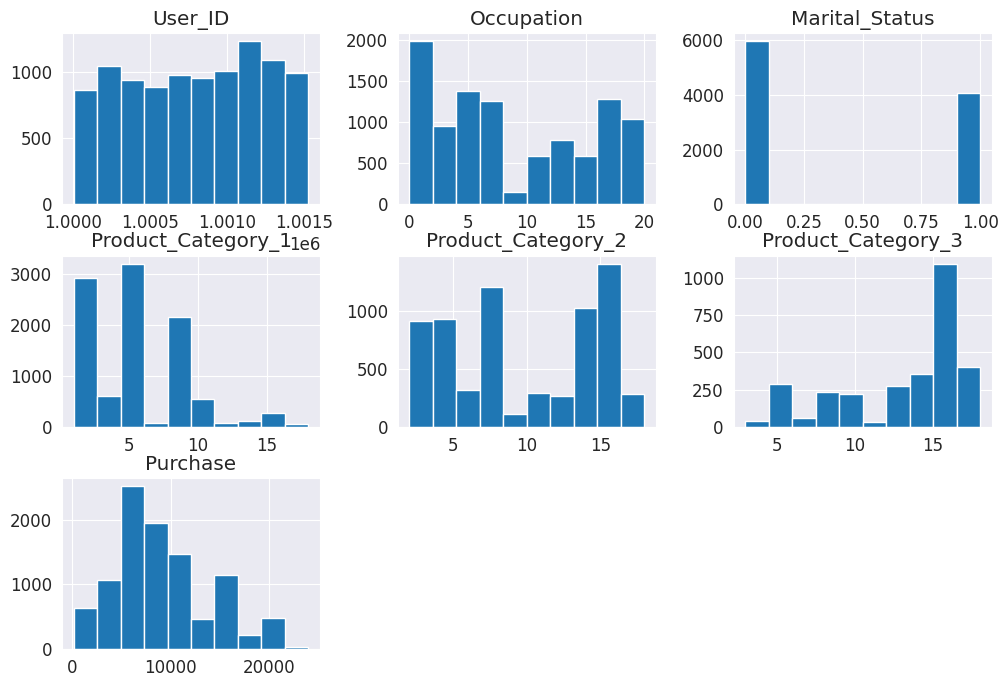

In [19]:
# 直方图 -  查看数值特征分布
df.hist(figsize=(12, 8))
plt.show()

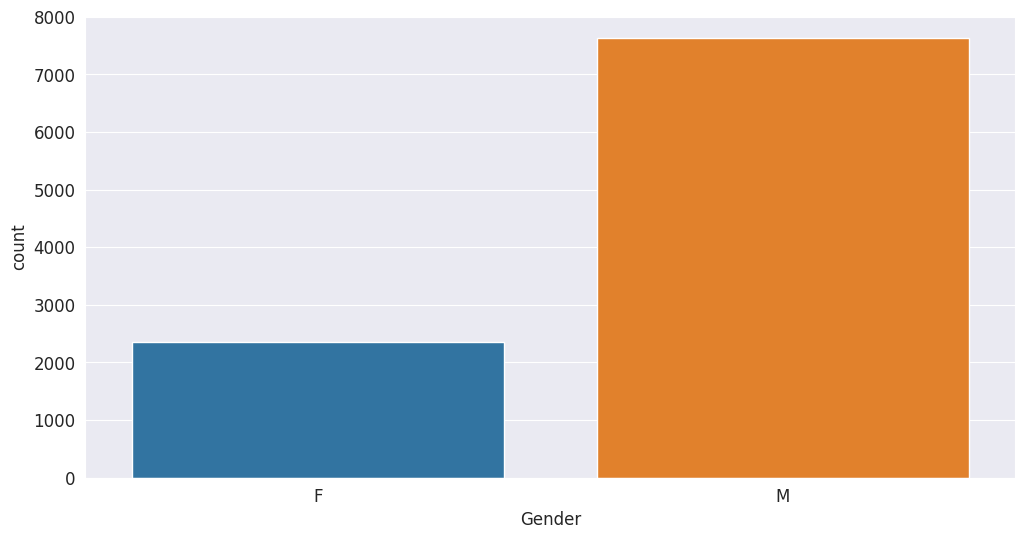

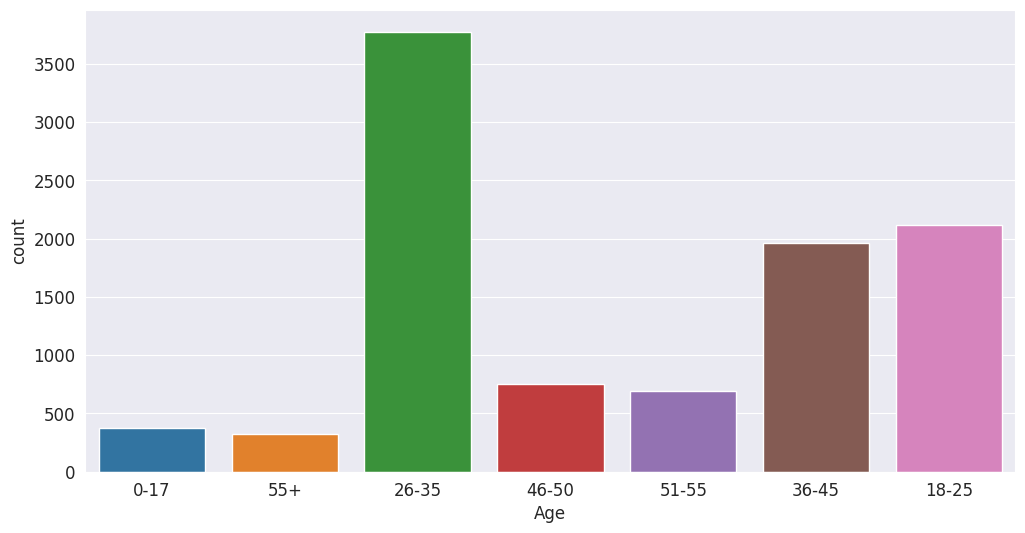

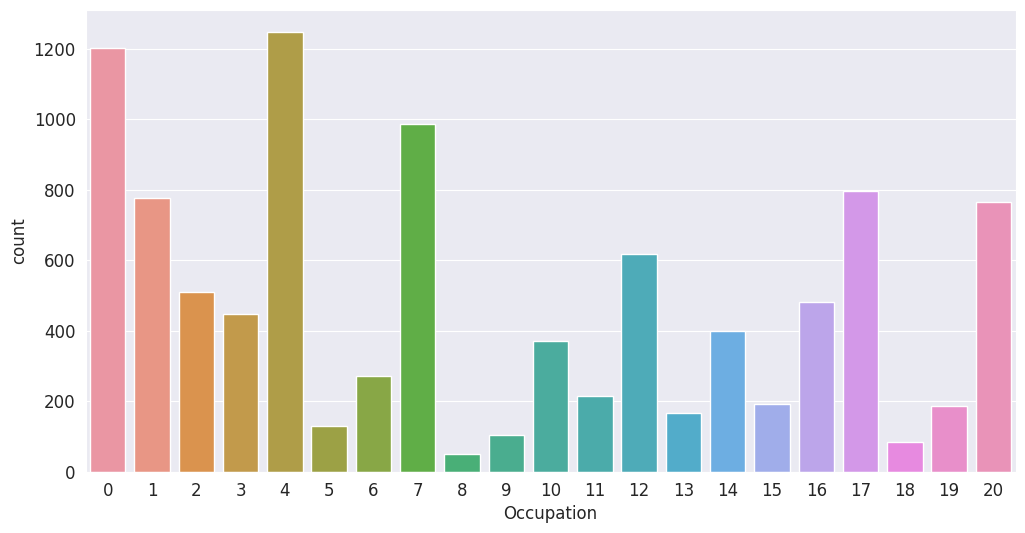

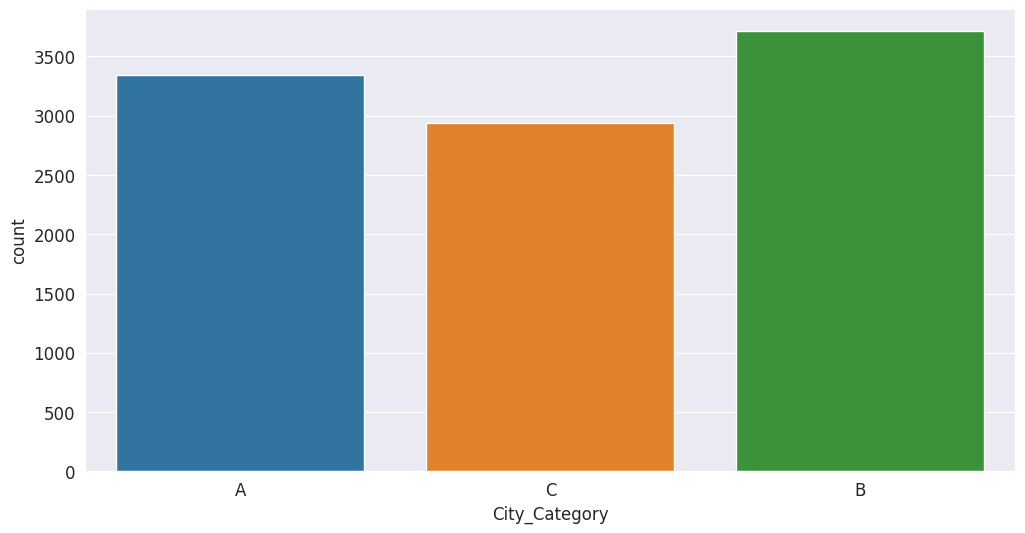

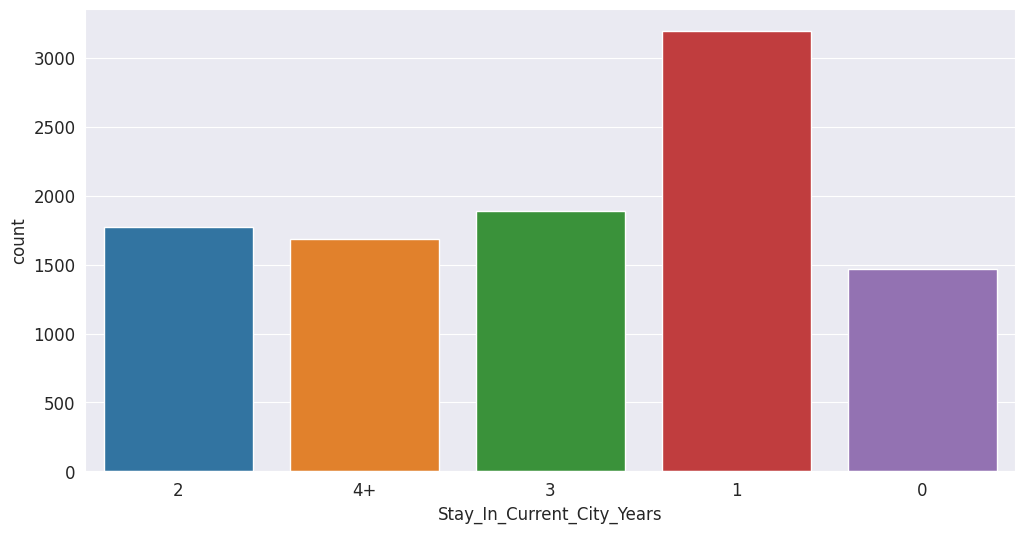

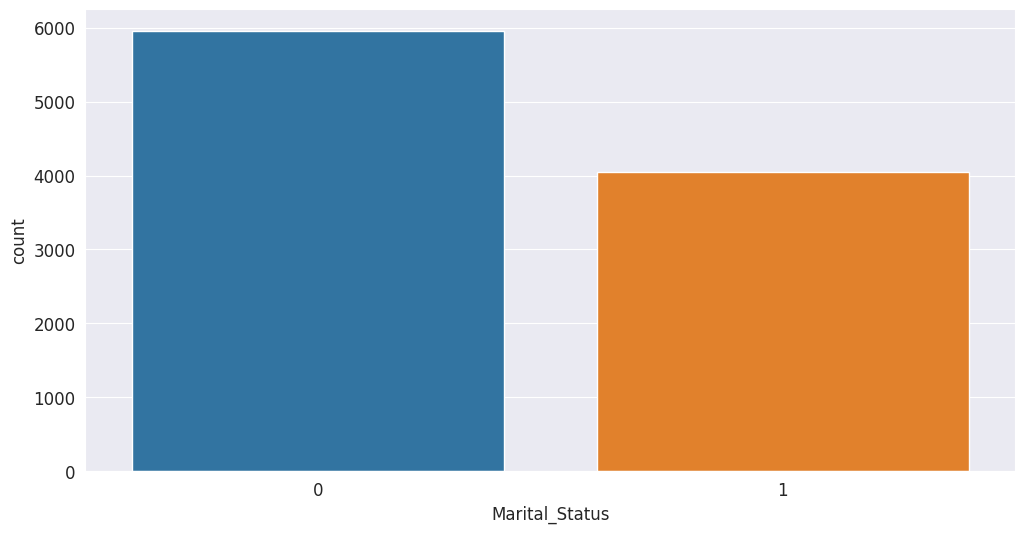

In [20]:
# 条形图 - 查看类别特征分布
for col in ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']:
    sns.countplot(x=col, data=df)
    plt.show()

# 特征工程

## 删除分析和构建模型不需要的列

In [21]:
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

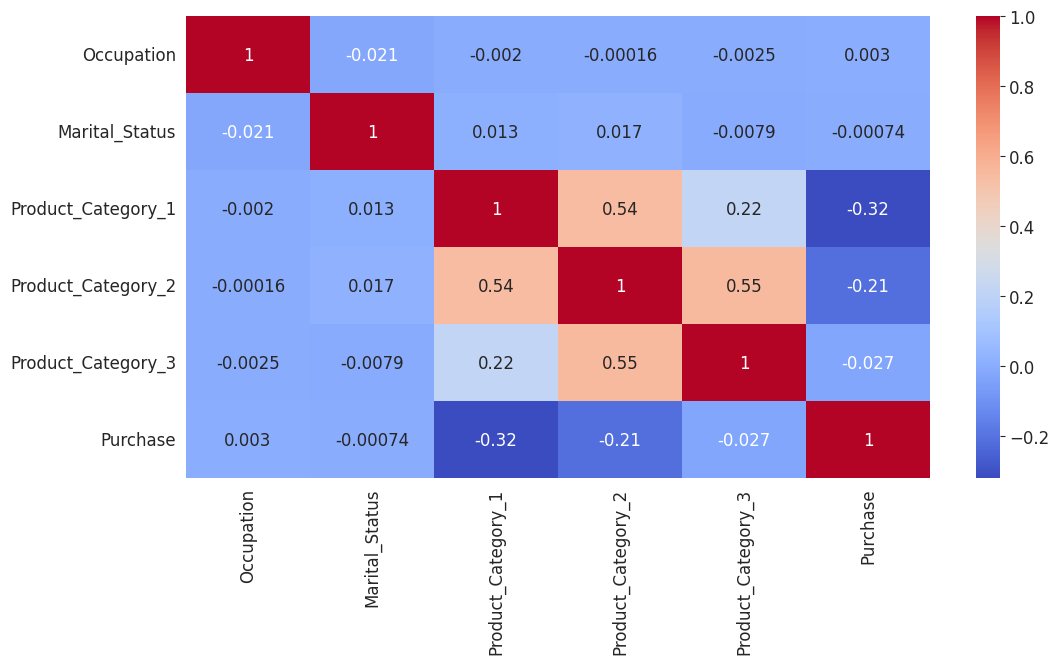

In [22]:
# 选择数值型列
numeric_df = df.select_dtypes(include=['number'])

# 计算相关性并绘制热力图
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

## 缺失值

In [23]:
df.isnull().sum()

Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Stay_In_Current_City_Years       0
Marital_Status                   0
Product_Category_1               0
Product_Category_2            3243
Product_Category_3            7003
Purchase                         0
dtype: int64

In [24]:
!pip install missingno --quiet

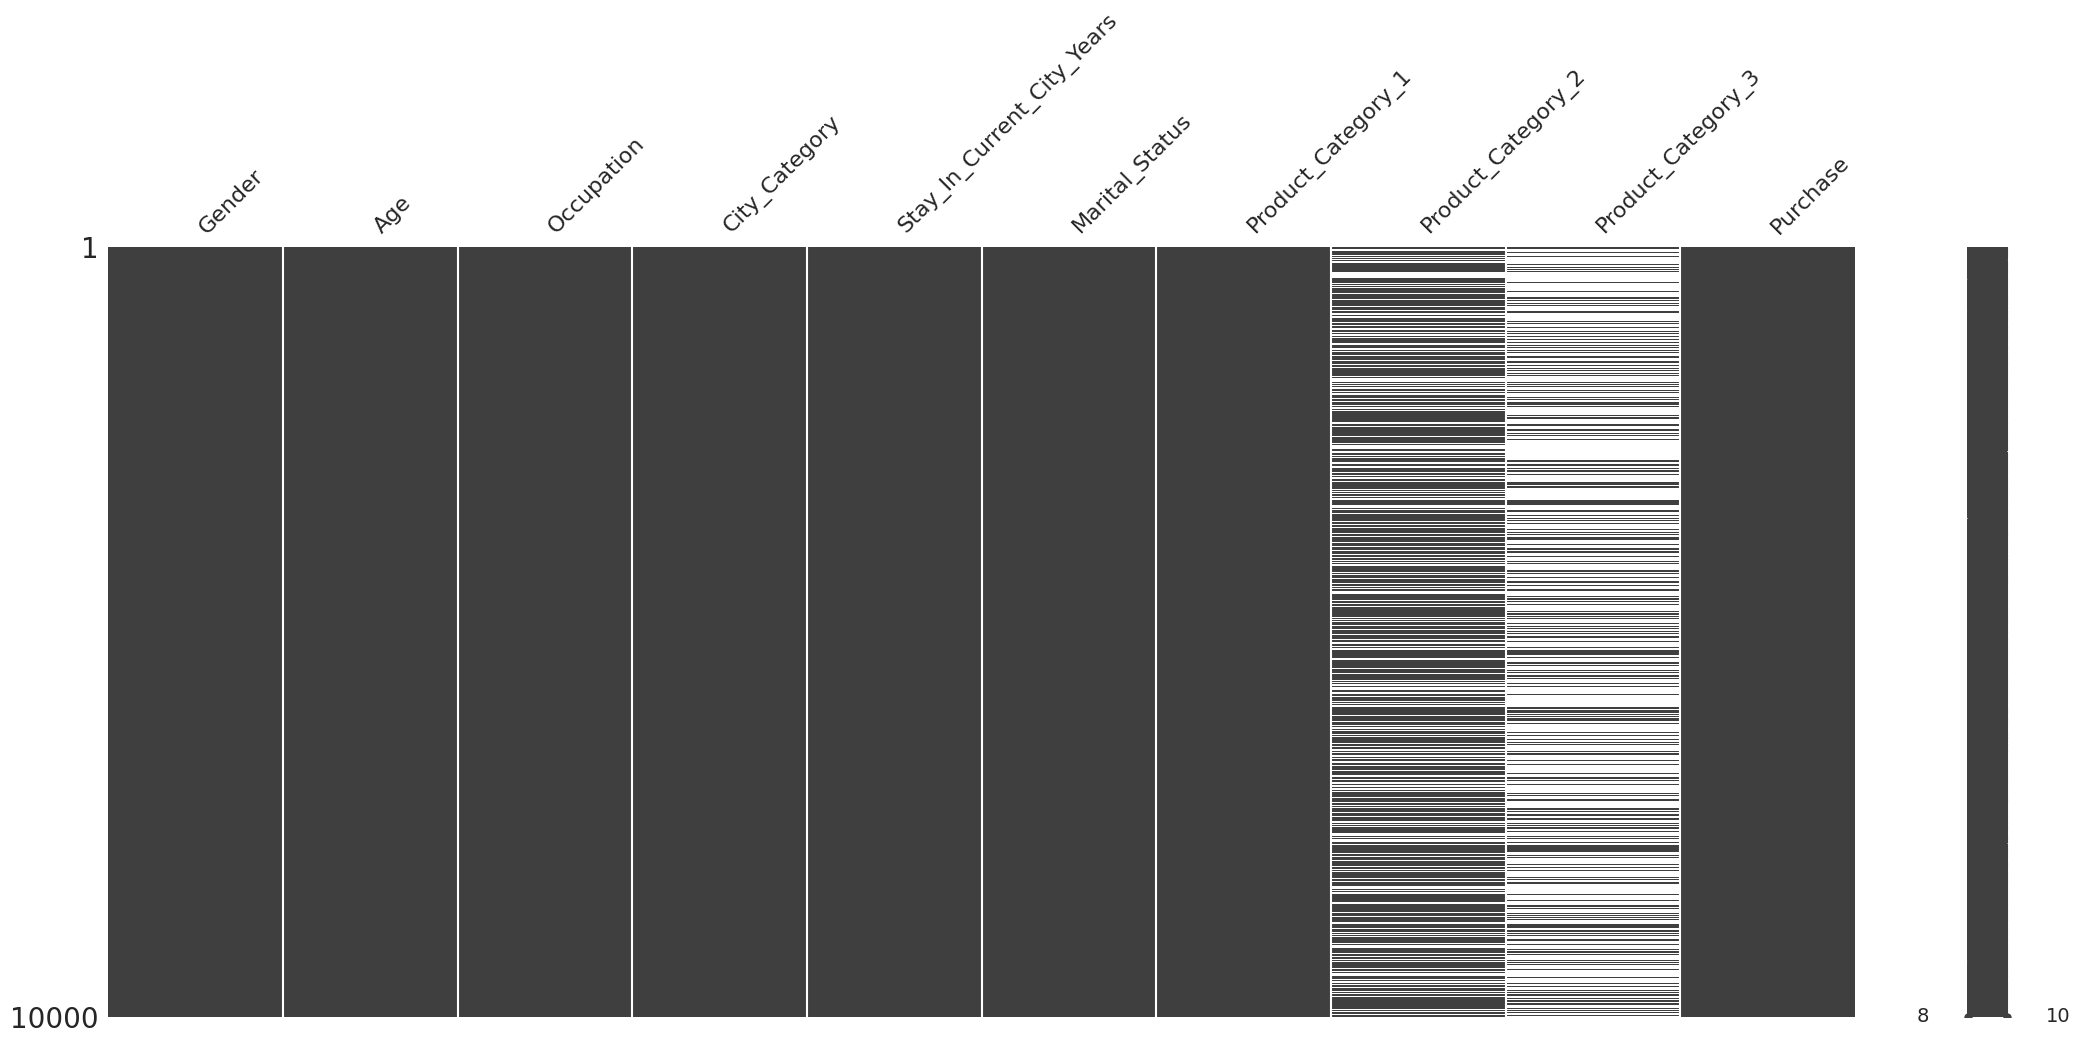

In [25]:
## Reading the missingno 
import missingno as msno

msno.matrix(df)   ## Used to plot the missingno matrix 
plt.show()

In [26]:
# 填充缺失值
# 由于Product_Category_2和Product_Category_3有缺失值，可以考虑用-1这种特殊值填充
df['Product_Category_2'].fillna(-1, inplace=True)
df['Product_Category_3'].fillna(-1, inplace=True)

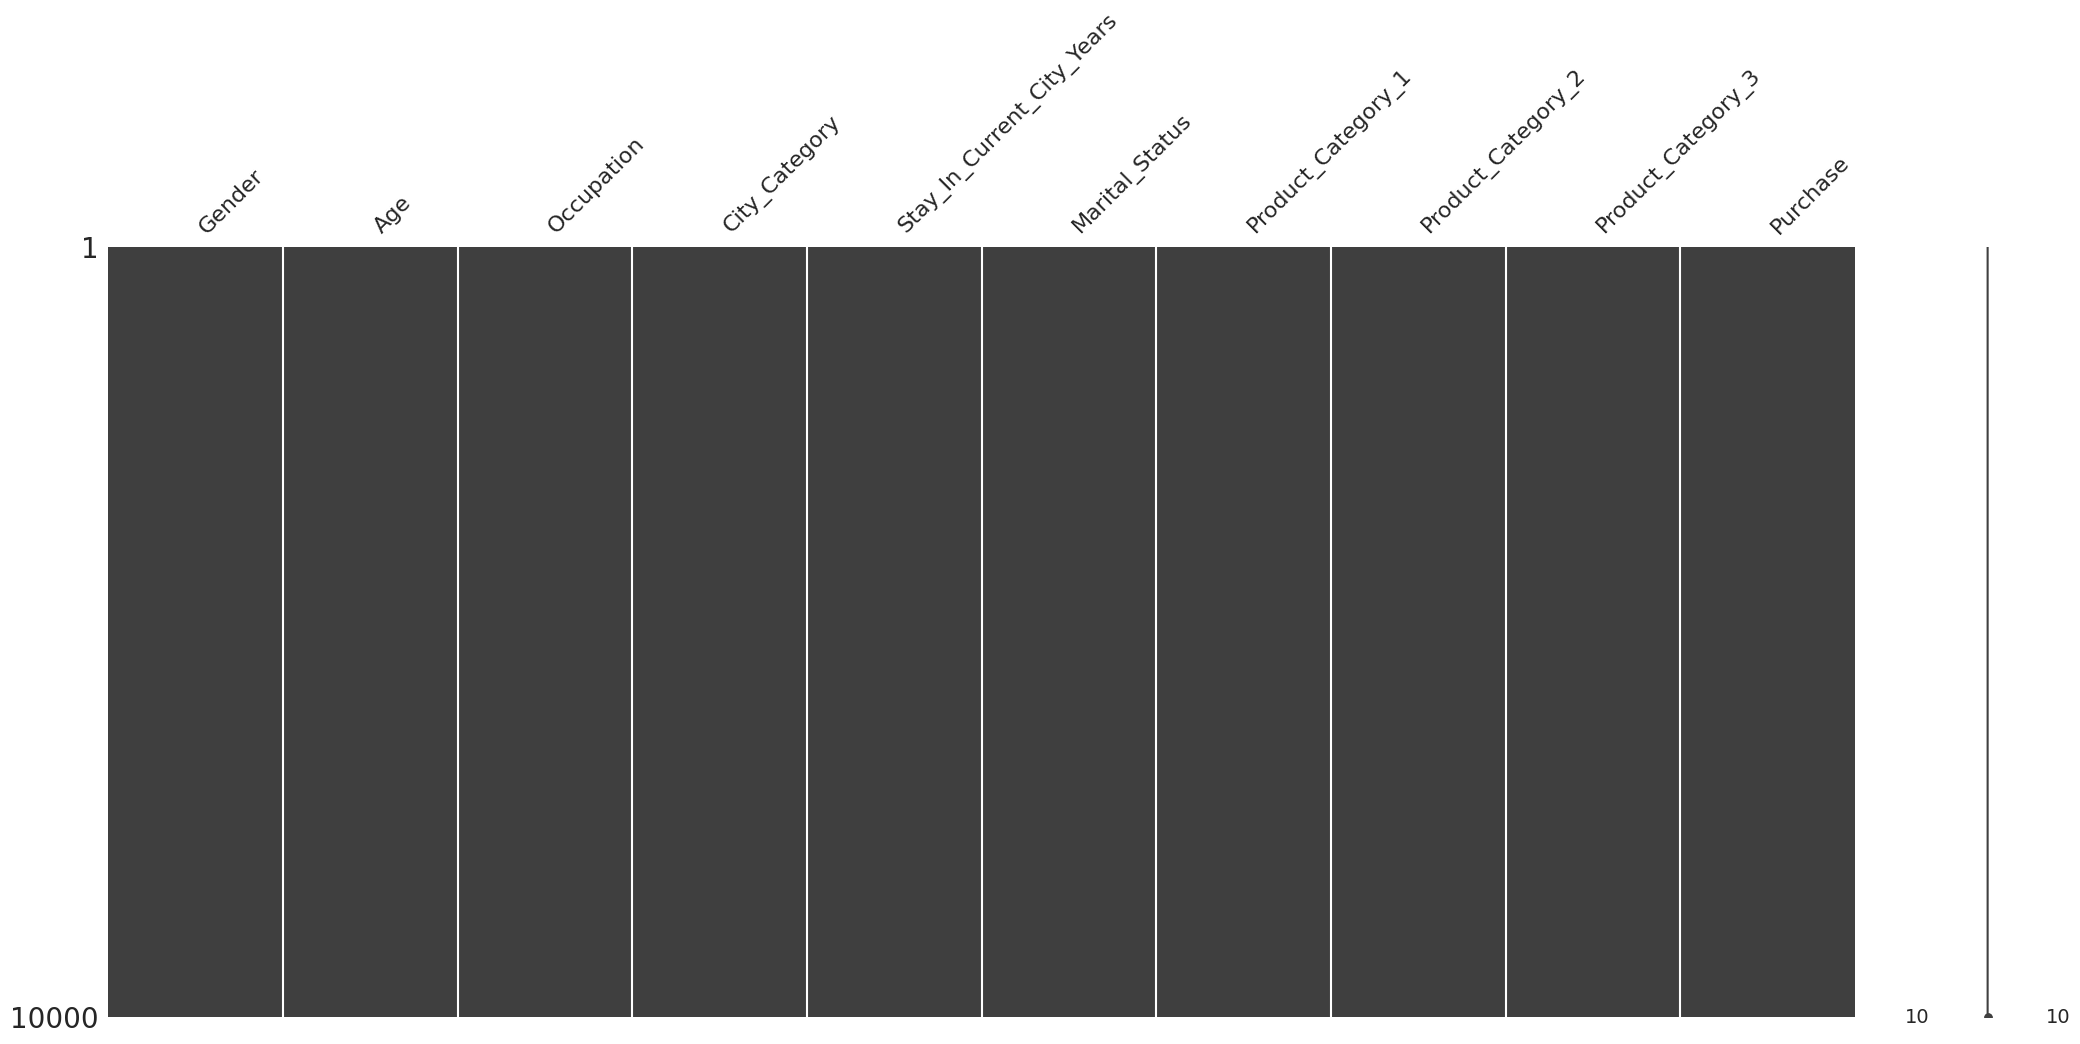

In [27]:
msno.matrix(df)   ## Used to plot the missingno matrix 
plt.show()

# 离群&&异常值

In [28]:
# 不唯一值
df.nunique()

Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              18
Product_Category_3              16
Purchase                      5876
dtype: int64

In [29]:
# 描述性统计
df['Purchase'].describe()

count    10000.000000
mean      9152.487700
std       4881.543001
min        186.000000
25%       5831.750000
50%       8021.500000
75%      11922.250000
max      23958.000000
Name: Purchase, dtype: float64

In [30]:
# 百分位数
percentiles = [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
df['Purchase'].quantile(percentiles)

0.25     5831.75
0.50     8021.50
0.75    11922.25
0.90    16035.40
0.95    19251.05
0.99    20625.04
Name: Purchase, dtype: float64

<Axes: xlabel='Purchase', ylabel='Count'>

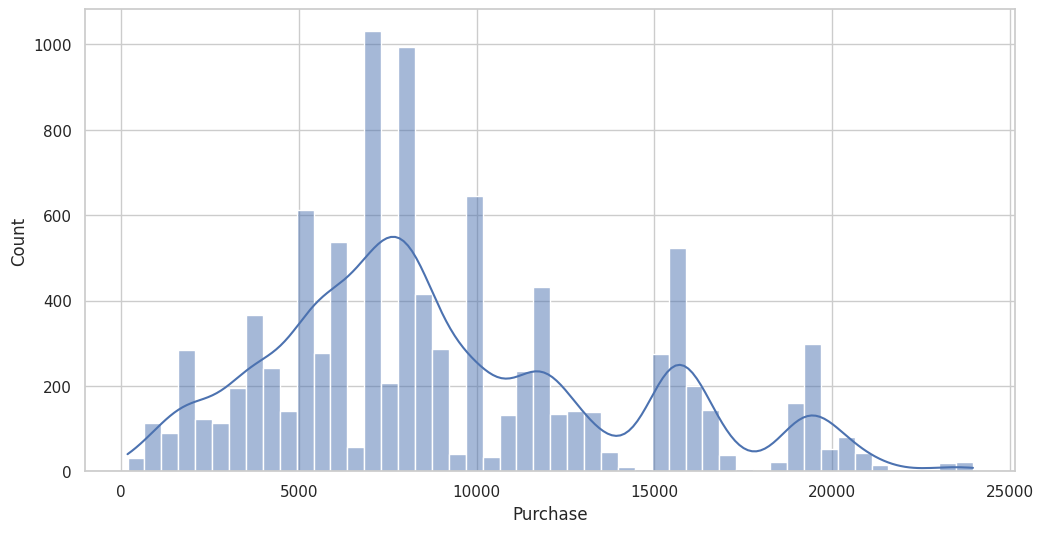

In [31]:
# 设置绘图样式
sns.set(style="whitegrid")

# 创建图形和轴
plt.figure(figsize=(12, 6))

# 绘制Purchase列的分布柱状图
sns.histplot(df['Purchase'], bins=50, kde=True)

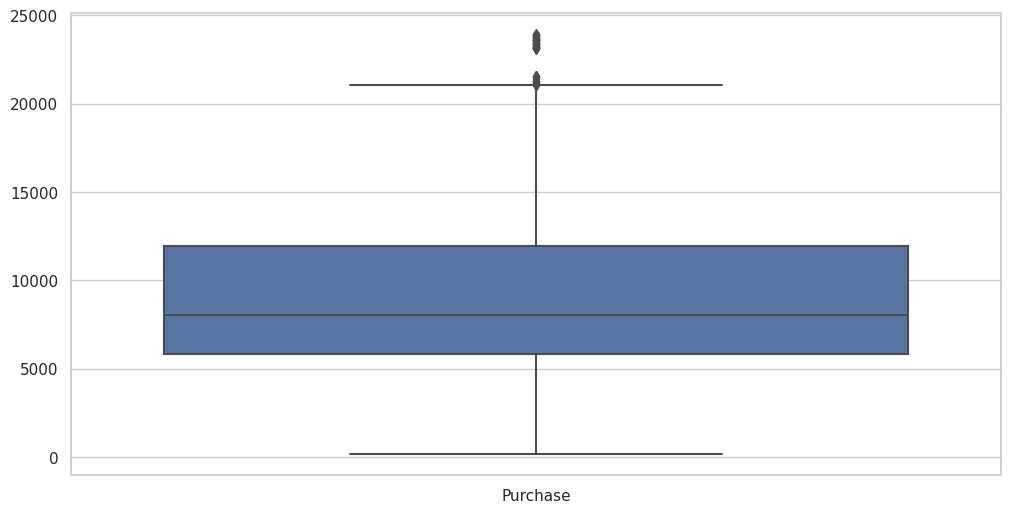

In [32]:
# 箱线图 - 查看数值特征离群值
sns.boxplot(data=df[['Purchase']])
plt.show()

# 特征编码

In [33]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# 标签编码

In [34]:
# 创建 LabelEncoder 对象
le_age = LabelEncoder()
le_stay = LabelEncoder()

# 对 'Age' 特征进行标签编码
df['Age_Encoded'] = le_age.fit_transform(df['Age'])

# 对 'Stay_In_Current_City_Years' 特征进行标签编码
df['Stay_Encoded'] = le_stay.fit_transform(df['Stay_In_Current_City_Years'])

# 删除原始的类别特征
df.drop(['Age', 'Stay_In_Current_City_Years'], axis=1, inplace=True)

In [35]:
# 数据基本信息
df.sample(15)

,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Stay_Encoded
3206,M,0,A,0,8,13.0,14.0,2213,1,0
5605,M,20,B,0,1,2.0,-1.0,19346,3,4
4642,F,3,A,0,5,6.0,16.0,8770,2,3
7056,M,4,A,1,8,-1.0,-1.0,6088,1,0
6155,M,3,B,0,1,15.0,16.0,19387,2,2
1526,M,16,B,0,1,8.0,-1.0,11488,3,0
2142,F,2,A,1,1,2.0,5.0,11642,6,3
7368,F,20,A,0,5,-1.0,-1.0,1985,2,1
867,M,10,C,0,5,-1.0,-1.0,8817,0,0
2124,M,1,C,1,8,14.0,-1.0,9942,5,3


# 独热编码

In [36]:
# 创建 OneHotEncoder 对象
ohe = OneHotEncoder(handle_unknown='ignore')

# 选择需要进行独热编码的特征
ohe_features = ['Gender', 'City_Category']

# 使用 fit_transform 方法对特征进行编码
ohe_data = ohe.fit_transform(df[ohe_features]).toarray()

# 将编码后的数据转换为 DataFrame
ohe_df = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(ohe_features))

# 将编码后的 DataFrame 与原始 DataFrame 合并
df = pd.concat([df, ohe_df], axis=1)

# 删除原始的类别特征
df.drop(ohe_features, axis=1, inplace=True)

In [37]:
# 数据基本信息
df.sample(15)

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Age_Encoded,Stay_Encoded,Gender_F,Gender_M,City_Category_A,City_Category_B,City_Category_C
7702,1,1,5,-1.0,-1.0,7095,2,1,1.0,0.0,0.0,1.0,0.0
5394,17,0,2,5.0,15.0,15988,3,1,0.0,1.0,1.0,0.0,0.0
6123,15,0,1,6.0,8.0,19644,2,2,0.0,1.0,0.0,1.0,0.0
9539,20,0,1,5.0,18.0,11680,3,0,0.0,1.0,0.0,1.0,0.0
5812,15,1,1,2.0,9.0,15186,2,2,0.0,1.0,1.0,0.0,0.0
2912,4,0,8,14.0,17.0,10004,1,1,1.0,0.0,1.0,0.0,0.0
9845,4,0,5,-1.0,-1.0,5354,1,2,0.0,1.0,1.0,0.0,0.0
631,9,1,1,6.0,16.0,18971,3,4,0.0,1.0,0.0,1.0,0.0
1529,16,0,5,8.0,18.0,5365,3,0,0.0,1.0,0.0,1.0,0.0
8727,0,0,8,-1.0,-1.0,5857,3,1,0.0,1.0,0.0,0.0,1.0


In [38]:
# 数据类型信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Occupation          10000 non-null  int64  
 1   Marital_Status      10000 non-null  int64  
 2   Product_Category_1  10000 non-null  int64  
 3   Product_Category_2  10000 non-null  float64
 4   Product_Category_3  10000 non-null  float64
 5   Purchase            10000 non-null  int64  
 6   Age_Encoded         10000 non-null  int64  
 7   Stay_Encoded        10000 non-null  int64  
 8   Gender_F            10000 non-null  float64
 9   Gender_M            10000 non-null  float64
 10  City_Category_A     10000 non-null  float64
 11  City_Category_B     10000 non-null  float64
 12  City_Category_C     10000 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 1015.8 KB


In [39]:
# 特征缩放
num_features = ['Occupation', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Age_Encoded', 'Stay_Encoded'] 

In [40]:
from sklearn.preprocessing import StandardScaler

# 创建 StandardScaler 对象
scaler = StandardScaler()

# 使用 fit_transform 方法对特征进行缩放
df[num_features] = scaler.fit_transform(df[num_features])

In [41]:
from sklearn.preprocessing import MinMaxScaler

# 创建 MinMaxScaler 对象
scaler = MinMaxScaler()

# 使用 fit_transform 方法对特征进行缩放
df[num_features] = scaler.fit_transform(df[num_features])

In [42]:
# 数据类型信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Occupation          10000 non-null  float64
 1   Marital_Status      10000 non-null  int64  
 2   Product_Category_1  10000 non-null  float64
 3   Product_Category_2  10000 non-null  float64
 4   Product_Category_3  10000 non-null  float64
 5   Purchase            10000 non-null  int64  
 6   Age_Encoded         10000 non-null  float64
 7   Stay_Encoded        10000 non-null  float64
 8   Gender_F            10000 non-null  float64
 9   Gender_M            10000 non-null  float64
 10  City_Category_A     10000 non-null  float64
 11  City_Category_B     10000 non-null  float64
 12  City_Category_C     10000 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


# 模型训练

In [43]:
from sklearn.model_selection import train_test_split

# 划分训练集和测试集
X = df.drop('Purchase', axis=1)
y = df['Purchase']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 定义模型
models = [
    ('Linear Regression', LinearRegression()),
    ('Decision Tree', DecisionTreeRegressor(random_state=42)),
    ('Random Forest', RandomForestRegressor(random_state=42)),
    ('Gradient Boosting', GradientBoostingRegressor(random_state=42))
]

# 训练和评估模型
for name, model in models:
    print(f'---- {name} ----')

    # 训练模型
    model.fit(X_train, y_train)

    # 预测
    y_pred = model.predict(X_test)

    # 评估指标
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'R-squared: {r2:.2f}')

    # 使用交叉验证评估模型 (可选)
    cv_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    print(f'Cross-validation MSE: {-cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})')

# 4. 模型调优 (以随机森林为例)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# 最佳模型
best_model = grid_search.best_estimator_

# 最佳参数
print(f'\nBest Parameters for Random Forest: {grid_search.best_params_}')

# 评估最佳模型
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'---- Best Random Forest ----')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')

---- Linear Regression ----
MSE: 19336480.34
RMSE: 4397.33
R-squared: 0.17
Cross-validation MSE: 20497105.78 (+/- 296905.21)
---- Decision Tree ----
MSE: 14908139.68
RMSE: 3861.11
R-squared: 0.36


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Cross-validation MSE: 18046952.99 (+/- 688284.83)
---- Random Forest ----


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSE: 9456004.32
RMSE: 3075.06
R-squared: 0.59
Cross-validation MSE: 10333867.05 (+/- 640643.01)
---- Gradient Boosting ----


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


MSE: 8576631.49
RMSE: 2928.59
R-squared: 0.63
Cross-validation MSE: 9038538.65 (+/- 631214.39)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}
---- Best Random Forest ----
MSE: 8535450.87
RMSE: 2921.55
R-squared: 0.63


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
